In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data= pd.read_excel(r"C:\Users\USMA130037\Downloads\Chaffee_East_Abatement_Tracking_Log.xlsx")
y=data["Abatement Status"].value_counts().values
lab=data["Abatement Status"].value_counts().index.values
area= data["Area"].value_counts().values
area_lab= data["Area"].value_counts().index.values

data_12=data[data["Area"]==12]
y_12=data_12["Abatement Status"].value_counts().values
lab_12=data_12["Abatement Status"].value_counts().index.values
area_12= data_12["Area"].value_counts().values
area_lab_12= data_12["Area"].value_counts().index.values
value_counts = data_12['Removal Start Date'].value_counts().sort_index()
dates = value_counts.index.tolist()  
counts = value_counts.values.tolist()
sums = []

for i in range(0, len(counts[:]), 2):
    if i + 1 < len(counts):
        pair_sum = counts[i] + counts[i + 1]
        sums.append(pair_sum)
    else:
        pass

filtered_timestamps = dates[::2]

results = []
for date in filtered_timestamps:
    year, week_number, _ = date.isocalendar()
    formatted_result = f"{year}-{week_number:02d}" 
    results.append(formatted_result)
df=pd.DataFrame({'Results': results, 'Sums': sums})
ff=df.drop_duplicates(subset='Results', keep='last')
grouped_df = data.groupby('Area')['Abatement Status'].value_counts().unstack().fillna(0)

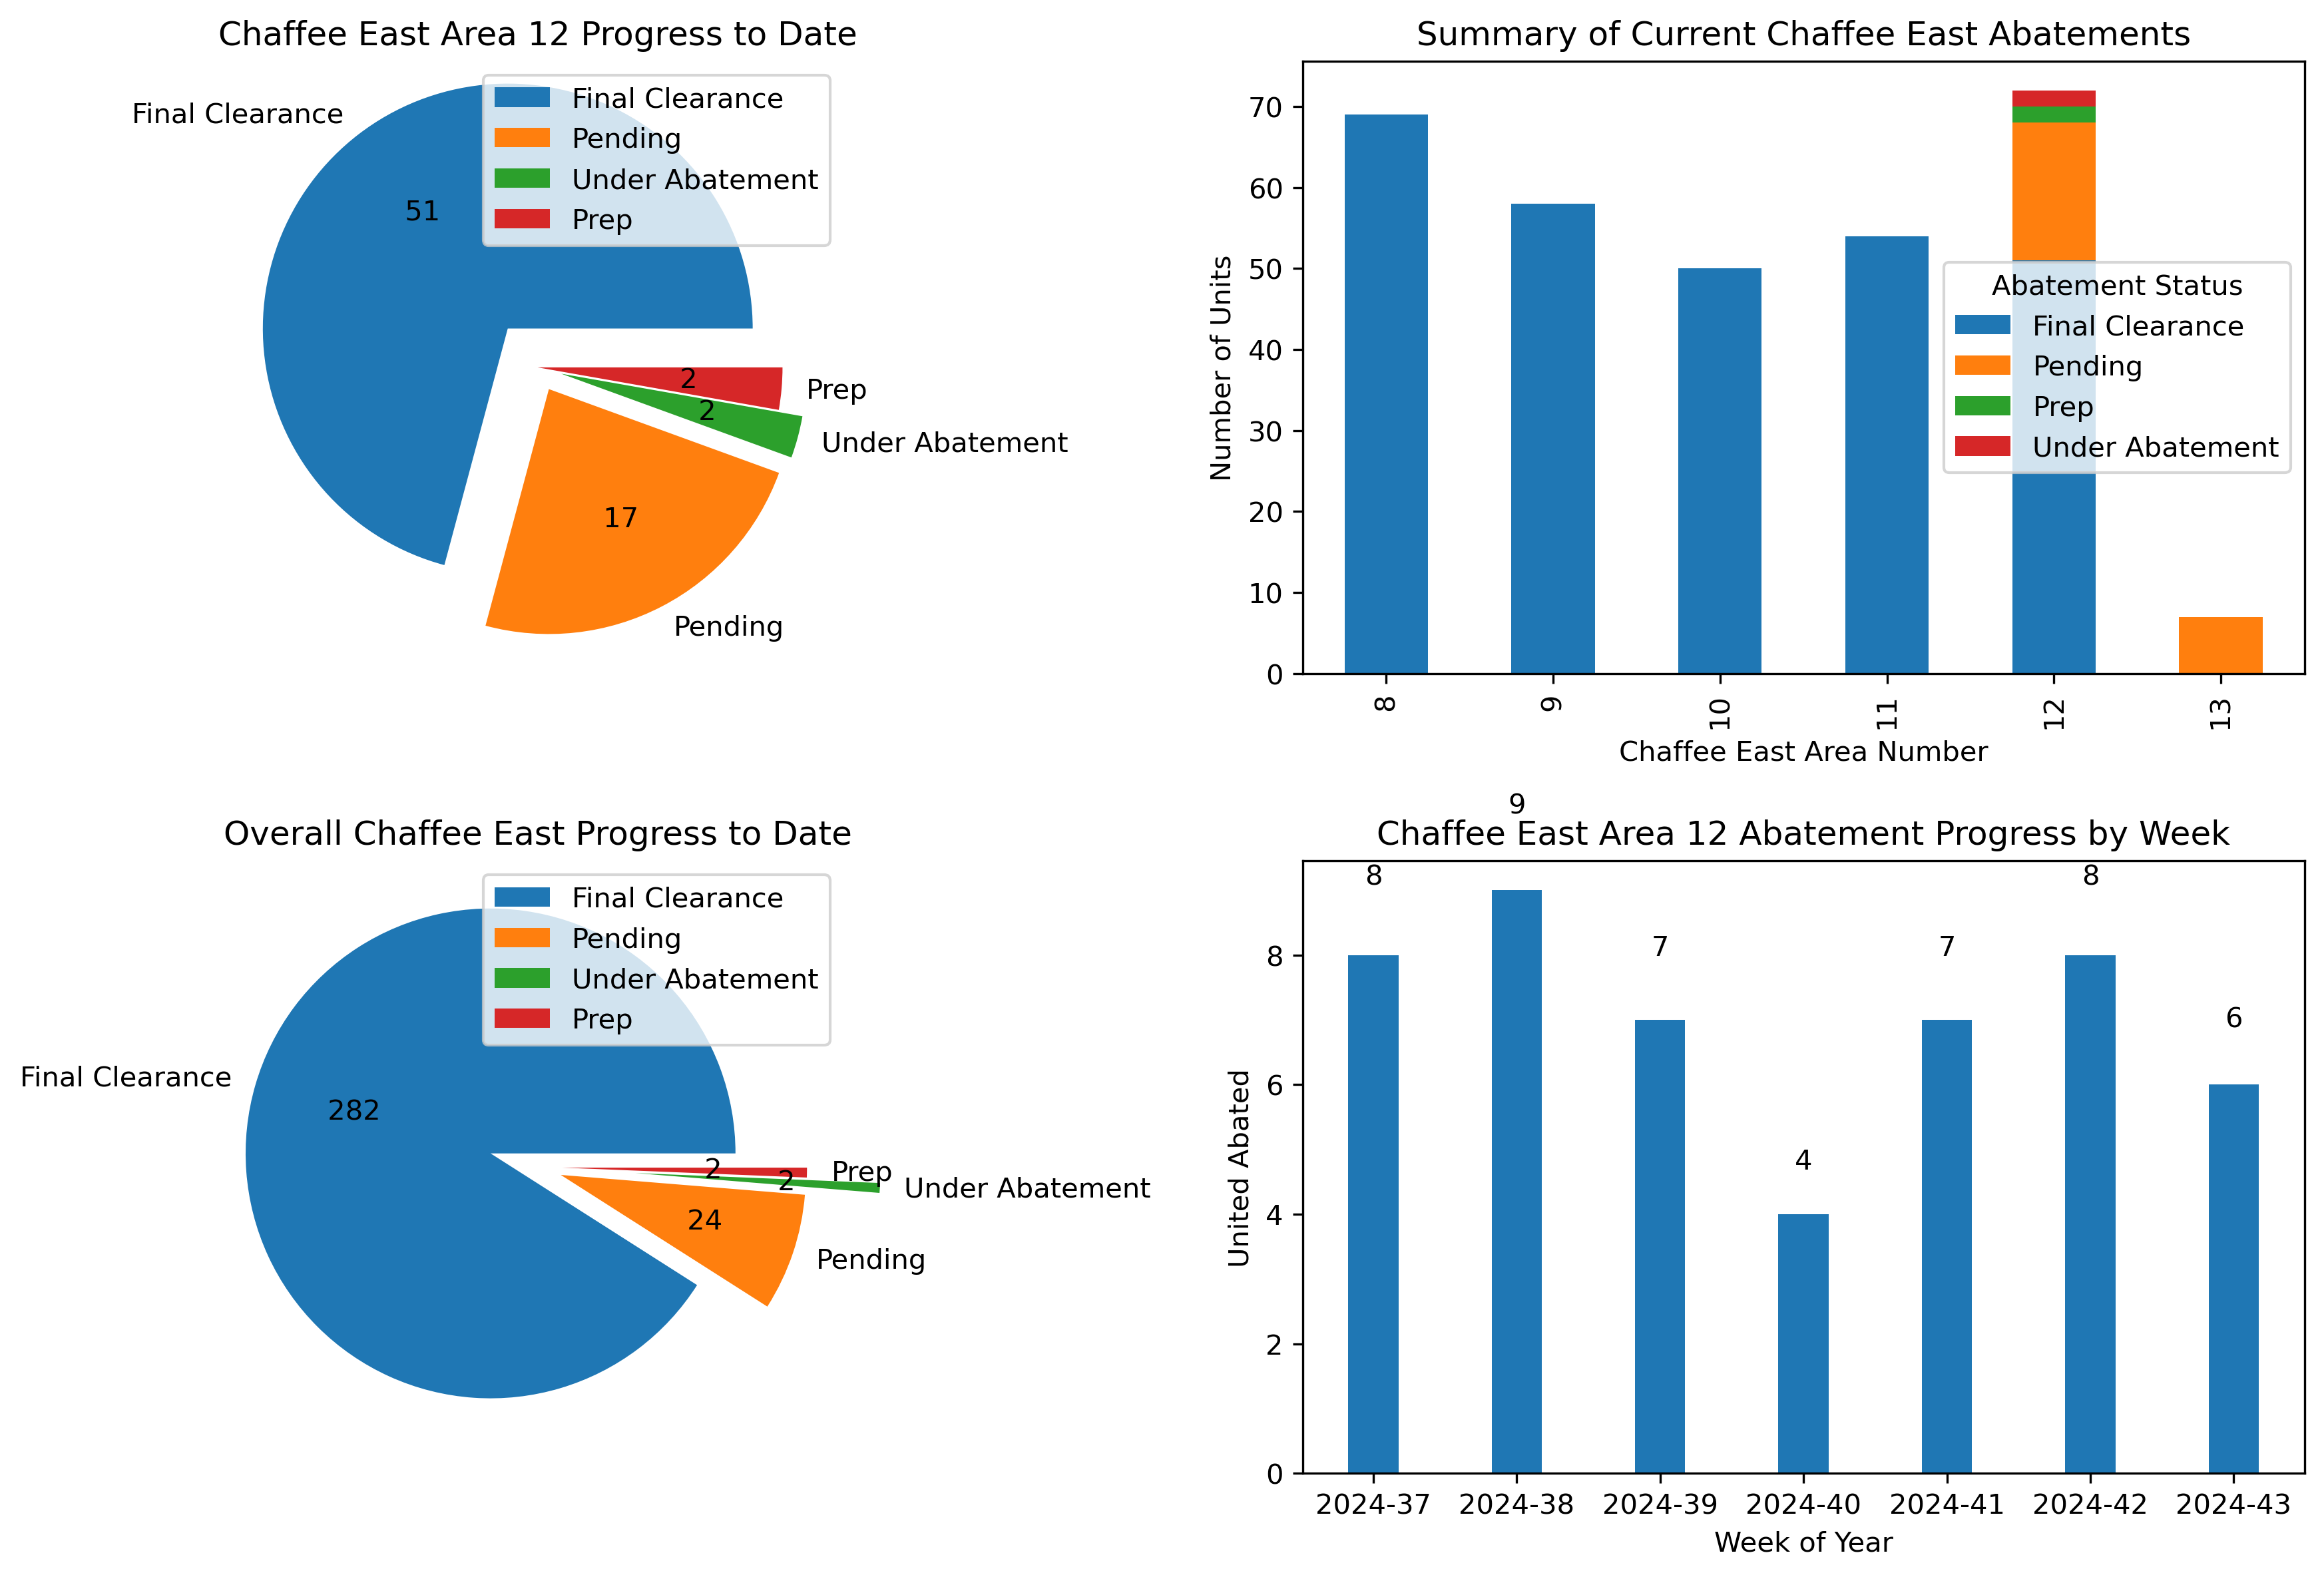

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter
import pdfkit
from PyPDF2 import PdfMerger

fig, axes = plt.subplots(2, 2, figsize=(12, 8), dpi=300)

ff_axes = axes[1, 1]  
bars = ff_axes.bar(ff["Results"], ff["Sums"], width=0.35) 

for bar, value in zip(bars, ff["Sums"]):
    yval = bar.get_height()

    if len(ff["Results"]) > 5:
        yval += value * 0.1 

    ff_axes.text(bar.get_x() + bar.get_width() / 2, yval + 0.2, value, ha='center', va='bottom')

ff_axes.set_xlabel('Week of Year')
ff_axes.set_ylabel('United Abated')
ff_axes.set_title('Chaffee East Area 12 Abatement Progress by Week')
#ff_axes.set_xticks(rotation=45, ha='center')  
#####################################################################
pie_axes_12 = axes[0, 0] 
myexplode_12 =  [0.2, 0.1, 0.1, 0]
pie_axes_12.pie(y_12,
                labels=lab_12,
                autopct=lambda p: f' {p * sum(y_12) / 100:.0f}',
                explode=myexplode_12)
pie_axes_12.set_title("Chaffee East Area 12 Progress to Date")
pie_axes_12.legend()
############################################################################
pie_axes_overall = axes[1, 0]  
myexplode_overall = [0.2, 0.1, 0.4, 0.1]

pie_axes_overall.pie(y,
                     labels=lab,
                     autopct=lambda p: f' {p * sum(y) / 100:.0f}',
                     explode=myexplode_overall)
pie_axes_overall.set_title("Overall Chaffee East Progress to Date")
pie_axes_overall.legend()
#######################################################################
grouped_df.plot(kind='bar', stacked=True, ax=axes[0, 1])  

axes[0, 1].set_xlabel('Chaffee East Area Number')
axes[0, 1].set_ylabel('Number of Units')
axes[0, 1].set_title('Summary of Current Chaffee East Abatements')

plt.tight_layout()
plt.savefig("figure.pdf", dpi=300)
plt.show()
#############
data_1= pd.read_excel(r"C:\Users\USMA130037\Downloads\file.xlsx")
data_1_12=data_1[data_1["Area"]==12]
start= data_1_12.reset_index().drop(columns=["index"]).iloc[:, [7,11]].replace(np.nan, 0)["Prep Start Date"]
end1= data_1_12.reset_index().drop(columns=["index"]).iloc[:, [7,9]].replace(np.nan, 0)["Interior Clearance"]
end= data_1_12.reset_index().drop(columns=["index"]).iloc[:, [7,11]].replace(np.nan, 0)["Exterior Final Clearance"]
end_date=[]
for i in range(end.shape[0]):
    if end[i]!=0:
        end_date.append(end[i].date())
    else:
        end_date.append(0)
        
start_date=[]
for i in range(start.shape[0]):
    if start[i]!=0:
        start_date.append(start[i].date())
    else:
        start_date.append(0)
        
        
end_date1=[]
for i in range(end1.shape[0]):
    if end1[i]!=0:
        end_date1.append(end1[i].date())
    else:
        end_date1.append(0)
        
        
result=[]
for i in range(start.shape[0]):
    if end[i] ==0:
        result.append(0)
    else:
        result.append(np.busday_count( (start_date[i]), (end_date[i]))+1 )

result1=[]
for i in range(start.shape[0]):
    if end1[i] ==0:
        result1.append(0)
    else:
        result1.append(np.busday_count( (start_date[i]), (end_date1[i]))+1 )
      
        
Full_Abatement=np.array(result).mean()
Interiors=np.array(result1).mean()
min_Interiors=np.array(result1).min()
max_Interiors=np.array(result1).max()

min_Full_Abatement=np.array(result).min()
max_Full_Abatement=np.array(result).max()

a1=y_12.max()
a2=(np.busday_count(pd.DataFrame(start_date).replace(0, np.nan).dropna().sort_values(by=0).iloc[0,0],pd.DataFrame(end_date).replace(0, np.nan).dropna().sort_values(by=0, ascending=False).iloc[0,0])+1)/5
a3=a1/a2
a4=len(data_1_12["Abatement Status"][data_1_12["Abatement Status"]!='Final Clearance'])
a5=a4/a3
a6=a2+a5


from tabulate import tabulate

data_t = [
    ["Area 12 Current Completion Rates and Projected Completion Times"],
    ["Current Completion Averages (Days)", "Completion Rates and Projections"],
    [["Interiors", "Full Abatement "],f"Full Abatements Completed to Date= {a1} "],
    [[f"Average = {round(Interiors,2)}  ", f"Average = {round(Full_Abatement,2)} "],f"Elapsed Weeks Since 1st Removal Start= {a2} "],
    [[f"Min = {round(min_Interiors,2)} ", f"Min = {round(min_Full_Abatement,2)} "],f"Overall Progress Rate (Units per Week)= {a3}"],
    [[f"Max = {round(max_Interiors,2)} ", f"Max = {round(max_Full_Abatement,2)} "],f"Remaining Units (Including In-Progress)= {a4} "],
    ["", f"Projected Weeks to Complete Remaining= {a5} "],
    ["", f"Projected Total Project Duration (Weeks)= {a6}"]

]

#print(tabulate(data_t, headers='firstrow', tablefmt='grid'))
pd.DataFrame(data_t).to_html("file_t.html")
pdfkit.from_file("file_t.html", "file_t.pdf")

###########
data.to_html("file.html")
pdfkit.from_file("file.html", "file.pdf")
pdf_files = ["figure.pdf","file_t.pdf", "file.pdf"]
merger = PdfMerger ()
for pdf in pdf_files:
    merger.append(pdf)
merger.write("Final.pdf")
merger.close()
############## the name of output file is Final.PDF######